# deep learning personal project : 🍔👁 Food Vision Big™

source dataset : https://www.kaggle.com/datasets/dansbecker/food-101

EfficientNetB0

In [ ]:
# prepare libary yang digunakan

import tensorflow as tf
import matplotlib.pyplot as plt
import os
import datetime
import numpy as np

In [ ]:
# GPU untuk training

!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-5edb06b3-4d5d-e91d-4fde-67745ee5cfd8)


In [ ]:
# Mount gdrive

from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mengambil dataset dari gdrive

from zipfile import ZipFile

food_file = '/content/drive/MyDrive/10_food_classes_10_percent.zip'
with ZipFile(food_file) as zip:
  zip.extractall()

In [ ]:
!ls 10_food_classes_10_percent

test  train


In [ ]:
# split train and test

dir_path = '10_food_classes_10_percent/'
training_set_dir = dir_path + 'train/'
test_set_dir = dir_path + 'test/'

## Preprocessing the data

In [ ]:
for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"Terdapat {len(dirnames)} direktori and {len(filenames)} file gambar di '{dirpath}'.")

Terdapat 2 direktori and 0 file gambar di '10_food_classes_10_percent/'.
Terdapat 10 direktori and 0 file gambar di '10_food_classes_10_percent/train'.
Terdapat 0 direktori and 75 file gambar di '10_food_classes_10_percent/train/chicken_wings'.
Terdapat 0 direktori and 75 file gambar di '10_food_classes_10_percent/train/chicken_curry'.
Terdapat 0 direktori and 75 file gambar di '10_food_classes_10_percent/train/fried_rice'.
Terdapat 0 direktori and 75 file gambar di '10_food_classes_10_percent/train/sushi'.
Terdapat 0 direktori and 75 file gambar di '10_food_classes_10_percent/train/hamburger'.
Terdapat 0 direktori and 75 file gambar di '10_food_classes_10_percent/train/pizza'.
Terdapat 0 direktori and 75 file gambar di '10_food_classes_10_percent/train/ramen'.
Terdapat 0 direktori and 75 file gambar di '10_food_classes_10_percent/train/ice_cream'.
Terdapat 0 direktori and 75 file gambar di '10_food_classes_10_percent/train/steak'.
Terdapat 0 direktori and 75 file gambar di '10_food_cl

In [ ]:
# import fungsi untuk penyiapan dataset dalam format TensorFlow
from tensorflow.keras.preprocessing import image_dataset_from_directory

# ukuran gambar input yang akan diproses (tinggi, lebar)
# jika ukuran berbeda maka akan dibuat menjadi ukuran ini
IMAGE_SIZE = (224, 224)

# ukuran batch (jumlah gambar perbatch) yang akan dibuat
# jika gunakan nilai default = 32
# maka batch yang terdiri dari 32 gambar akan dikirimkan ke model pada setiap putaran
BATCH_SIZE = 32

# Penyiapan training set
# Lihat buku untuk penjelasan setiap parameter
training_set = image_dataset_from_directory(directory=training_set_dir,
                                            image_size=IMAGE_SIZE,
                                            label_mode='categorical',
                                            batch_size=BATCH_SIZE,
                                            validation_split=0.3,
                                            subset='training',
                                            seed=42)

# Penyiapan validation set (30% dari training set)
validation_set = image_dataset_from_directory(directory=training_set_dir,
                                            image_size=IMAGE_SIZE,
                                            label_mode='categorical',
                                            batch_size=BATCH_SIZE,
                                            validation_split=0.3,
                                            subset='validation',
                                            seed=42)

# Penyiapan test set
test_set = image_dataset_from_directory(directory=test_set_dir,
                                        image_size=IMAGE_SIZE,
                                        label_mode='categorical')

Found 750 files belonging to 10 classes.
Using 525 files for training.
Found 750 files belonging to 10 classes.
Using 225 files for validation.
Found 2500 files belonging to 10 classes.


In [ ]:
# lihat 10 nama kategori makanan pada dataset
training_set.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

## Create Model 3 (Hanya Mengubah Output Layer)

In [ ]:
tf.random.set_seed(32)

# Pretrained model
pretrained_model = tf.keras.applications.EfficientNetV2B0(weights='imagenet',
                                                        include_top=False,
                                                        pooling='avg')
# Buat agar paramater model tidak bisa diubah (frozen)
pretrained_model.trainable=False

24274472/24274472 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Model

# Buat Input baru karena kita menggunakan training set sendiri yang berbeda dengan ImageNet
inputs = Input(shape=(224,224,3), name='input_layer')

# Berikan Input layer baru sebagai input pada pretrained-model
revised_model_3 = pretrained_model(inputs)

# Definisikan output layer baru (karena kita menggunakan strategi 3)
outputs = Dense(10, activation='softmax', name='output_layer')(revised_model_3)

# Buat Model dengan menghubungkan antara inputs dan outputs
model_3 = Model(inputs, outputs, name='model_3')

In [ ]:
# Mari kita compile model_3 agar siap dilakukan
# pelatihan untuk parameter jaringan (bagian output saja pada kasus ini)
model_3.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics='accuracy')

In [ ]:
# lihat struktur dan parameter model
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, 1280)              5919312   
 nal)                                                            
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

# hapus log tensorboard dari hasil eksekusi sebelumnya jika ada
!rm -rf /logs/fit/

# load tensorboard dengan magic command Jupyter
%load_ext tensorboard

# tetapkan direktori penyimpanan data hasil tangkapan
log_folder = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# buat callback tensorboard
tb_callbacks = TensorBoard(log_dir=log_folder)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# buat EarlyStopping callback
es_callback = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# buat ModelCheckpoint callback
mpt_callback= ModelCheckpoint(filepath='best_model_3.hdf5', save_best_only=True, verbose=1)

In [ ]:
# Sekarang kita latih model_3 untuk mendapatkan parameter pada output layer
# Wow, kita mendapat akurasi 83%! dengan menggunakan strategi 3
tf.random.set_seed(42)

import time
start = time.perf_counter()

model_3.fit(training_set,
            epochs=100,
            validation_data=validation_set,
            callbacks = [tb_callbacks, es_callback, mpt_callback])

elapsed = time.perf_counter() - start

Epoch 1/100
17/17 [==============================] - ETA: 0s - loss: 1.9476 - accuracy: 0.3638
Epoch 1: val_loss improved from inf to 1.59220, saving model to best_model_3.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17/17 [==============================] - 21s 537ms/step - loss: 1.9476 - accuracy: 0.3638 - val_loss: 1.5922 - val_accuracy: 0.6400
Epoch 2/100
16/17 [===========================>..] - ETA: 0s - loss: 1.3064 - accuracy: 0.7148
Epoch 2: val_loss improved from 1.59220 to 1.18886, saving model to best_model_3.hdf5
17/17 [==============================] - 2s 123ms/step - loss: 1.2979 - accuracy: 0.7181 - val_loss: 1.1889 - val_accuracy: 0.7111
Epoch 3/100
16/17 [===========================>..] - ETA: 0s - loss: 0.9610 - accuracy: 0.8086
Epoch 3: val_loss improved from 1.18886 to 0.98524, saving model to best_model_3.hdf5
17/17 [==============================] - 2s 121ms/step - loss: 0.9637 - accuracy: 0.8038 - val_loss: 0.9852 - val_accuracy: 0.7511
Epoch 4/100
17/17 [==============================] - ETA: 0s - loss: 0.7595 - accuracy: 0.8533
Epoch 4: val_loss improved from 0.98524 to 0.87516, saving model to best_model_3.hdf5
17/17 [==============================] - 2s 118ms/step - loss: 

In [ ]:
print('Elapsed %.3f seconds.' % elapsed)

Elapsed 110.612 seconds.


In [ ]:
# %tensorboard --logdir={log_folder}

In [ ]:
from tensorflow.keras.models import load_model

# Load best hyperparameters dari hasil pembelajaran model yang telah dilakukan
best_model_3 = load_model('best_model_3.hdf5')

# Lakukan evaluasi kinerja model dengan test set
best_model_3.evaluate(test_set)

79/79 [==============================] - 9s 76ms/step - loss: 0.4063 - accuracy: 0.8732


[0.4063052833080292, 0.873199999332428]

## Create Model 2 (Trainable 10 Layer)

In [ ]:
# Set pretrained_model agar parameter jaringan bisa dilatih
pretrained_model.trainable=True

In [ ]:
print(len(pretrained_model.trainable_variables))

241


In [ ]:
# Perhatikan bahwa semua layer pada pretrained model telah di frozen!
for urutan, lapisan in enumerate(pretrained_model.layers):
  print(urutan, lapisan.name, lapisan.trainable)

0 input_1 True
1 rescaling True
2 normalization True
3 stem_conv True
4 stem_bn True
5 stem_activation True
6 block1a_project_conv True
7 block1a_project_bn True
8 block1a_project_activation True
9 block2a_expand_conv True
10 block2a_expand_bn True
11 block2a_expand_activation True
12 block2a_project_conv True
13 block2a_project_bn True
14 block2b_expand_conv True
15 block2b_expand_bn True
16 block2b_expand_activation True
17 block2b_project_conv True
18 block2b_project_bn True
19 block2b_drop True
20 block2b_add True
21 block3a_expand_conv True
22 block3a_expand_bn True
23 block3a_expand_activation True
24 block3a_project_conv True
25 block3a_project_bn True
26 block3b_expand_conv True
27 block3b_expand_bn True
28 block3b_expand_activation True
29 block3b_project_conv True
30 block3b_project_bn True
31 block3b_drop True
32 block3b_add True
33 block4a_expand_conv True
34 block4a_expand_bn True
35 block4a_expand_activation True
36 block4a_dwconv2 True
37 block4a_bn True
38 block4a_activ

In [ ]:
# sekarang kita unfrozen 10 layer pada bagian belakang lapisan convolution
for urutan, lapisan in enumerate(pretrained_model.layers[:-5]):
  lapisan.trainable=False

In [ ]:
print(len(pretrained_model.trainable_variables))

3


In [ ]:
# Berikan input layer sebagai input pada pretrained-model
revised_model_2 = pretrained_model(inputs)

# Definisikan output layer (strategi 2)
outputs = Dense(10, activation='softmax', name='output_layer')(revised_model_2)

# defisinikan model dengan strategi 3 dengan me-link inputs dan outputs
model_2 = Model(inputs, outputs, name='model_2')

In [ ]:
# Mari kita compile model_2 agar siap dilakukan pelatihan untuk parameter jaringan
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(), #learning_rate=0.0001
                metrics='accuracy')

In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, 1280)              5919312   
 nal)                                                            
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 261130 (1020.04 KB)
Non-trainable params: 5670992 (21.63 MB)
_________________________________________________________________


In [ ]:
log_folder = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tb_callbacks = TensorBoard(log_dir=log_folder)

In [ ]:
mpt_callback= ModelCheckpoint(filepath='best_model_2.hdf5', save_best_only=True, verbose=1)


In [ ]:
# Sekarang kita latih model_3 untuk mendapatkan parameter pada output layer
# Wow, kita mendapat akurasi 83%! dengan menggunakan strategi 3

tf.random.set_seed(42)

start = time.perf_counter()

model_2.fit(training_set,
            epochs=100,
            validation_data=validation_set,
            callbacks = [tb_callbacks, es_callback, mpt_callback])

elapsed = time.perf_counter() - start

Epoch 1/100
16/17 [===========================>..] - ETA: 0s - loss: 1.5929 - accuracy: 0.5371
Epoch 1: val_loss improved from inf to 0.89758, saving model to best_model_2.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17/17 [==============================] - 14s 292ms/step - loss: 1.5804 - accuracy: 0.5448 - val_loss: 0.8976 - val_accuracy: 0.7467
Epoch 2/100
16/17 [===========================>..] - ETA: 0s - loss: 0.6698 - accuracy: 0.8457
Epoch 2: val_loss improved from 0.89758 to 0.65420, saving model to best_model_2.hdf5
17/17 [==============================] - 2s 121ms/step - loss: 0.6662 - accuracy: 0.8476 - val_loss: 0.6542 - val_accuracy: 0.8089
Epoch 3/100
16/17 [===========================>..] - ETA: 0s - loss: 0.4289 - accuracy: 0.9082
Epoch 3: val_loss improved from 0.65420 to 0.57631, saving model to best_model_2.hdf5
17/17 [==============================] - 3s 137ms/step - loss: 0.4336 - accuracy: 0.9067 - val_loss: 0.5763 - val_accuracy: 0.8533
Epoch 4/100
16/17 [===========================>..] - ETA: 0s - loss: 0.3065 - accuracy: 0.9414
Epoch 4: val_loss improved from 0.57631 to 0.54680, saving model to best_model_2.hdf5
17/17 [==============================] - 4s 170ms/step - loss: 

In [ ]:
print('Elapsed %.3f seconds.' % elapsed)

Elapsed 64.005 seconds.


In [ ]:
# %tensorboard --logdir={log_folder} --port=8008

In [ ]:
# Load best hyperparameters from previous fit process
best_model_2 = load_model('best_model_2.hdf5')

# Let's evaluate the model
best_model_2.evaluate(test_set)

79/79 [==============================] - 7s 59ms/step - loss: 0.3371 - accuracy: 0.8892


[0.33708977699279785, 0.88919997215271]

## Create Model 1 (Seluruh Paramater Dilatih)

In [ ]:
# Set pretrained_model agar parameter jaringan bisa dilatih
pretrained_model.trainable=True

In [ ]:
# Perhatikan bahwa semua layer pada pretrained model telah di frozen!
for urutan, lapisan in enumerate(pretrained_model.layers):
  print(urutan, lapisan.name, lapisan.trainable)

0 input_1 True
1 rescaling True
2 normalization True
3 stem_conv True
4 stem_bn True
5 stem_activation True
6 block1a_project_conv True
7 block1a_project_bn True
8 block1a_project_activation True
9 block2a_expand_conv True
10 block2a_expand_bn True
11 block2a_expand_activation True
12 block2a_project_conv True
13 block2a_project_bn True
14 block2b_expand_conv True
15 block2b_expand_bn True
16 block2b_expand_activation True
17 block2b_project_conv True
18 block2b_project_bn True
19 block2b_drop True
20 block2b_add True
21 block3a_expand_conv True
22 block3a_expand_bn True
23 block3a_expand_activation True
24 block3a_project_conv True
25 block3a_project_bn True
26 block3b_expand_conv True
27 block3b_expand_bn True
28 block3b_expand_activation True
29 block3b_project_conv True
30 block3b_project_bn True
31 block3b_drop True
32 block3b_add True
33 block4a_expand_conv True
34 block4a_expand_bn True
35 block4a_expand_activation True
36 block4a_dwconv2 True
37 block4a_bn True
38 block4a_activ

In [ ]:
# Berikan input layer sebagai input pada pretrained-model
revised_model_1 = pretrained_model(inputs)

# Definisikan output layer (strategi 1)
outputs = Dense(10, activation='softmax', name='output_layer')(revised_model_1)

# defisinikan model dengan strategi 3 dengan me-link inputs dan outputs
model_1 = Model(inputs, outputs, name='model_1')

In [ ]:
# Mari kita compile model_1 agar siap dilakukan pelatihan untuk parameter jaringan
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(), #learning_rate=0.0001
                metrics='accuracy')

In [ ]:
log_folder = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tb_callbacks = TensorBoard(log_dir=log_folder)

In [ ]:
mpt_callback= ModelCheckpoint(filepath='best_model_1.hdf5', save_best_only=True, verbose=1)

In [ ]:
# Sekarang kita latih model_3 untuk mendapatkan parameter pada output layer
# Wow, kita mendapat akurasi 83%! dengan menggunakan strategi 3

tf.random.set_seed(42)

start = time.perf_counter()

model_1.fit(training_set,
            epochs=100,
            validation_data=validation_set,
            callbacks = [tb_callbacks, mpt_callback, es_callback])

elapsed = time.perf_counter() - start

Epoch 1/100
17/17 [==============================] - ETA: 0s - loss: 1.5248 - accuracy: 0.5105
Epoch 1: val_loss improved from inf to 0.86504, saving model to best_model_1.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17/17 [==============================] - 54s 431ms/step - loss: 1.5248 - accuracy: 0.5105 - val_loss: 0.8650 - val_accuracy: 0.7200
Epoch 2/100
17/17 [==============================] - ETA: 0s - loss: 0.3551 - accuracy: 0.8914
Epoch 2: val_loss did not improve from 0.86504
17/17 [==============================] - 4s 229ms/step - loss: 0.3551 - accuracy: 0.8914 - val_loss: 1.0499 - val_accuracy: 0.6667
Epoch 3/100
17/17 [==============================] - ETA: 0s - loss: 0.1349 - accuracy: 0.9676
Epoch 3: val_loss did not improve from 0.86504
17/17 [==============================] - 5s 283ms/step - loss: 0.1349 - accuracy: 0.9676 - val_loss: 0.8993 - val_accuracy: 0.7244
Epoch 4/100
17/17 [==============================] - ETA: 0s - loss: 0.0645 - accuracy: 0.9810
Epoch 4: val_loss did not improve from 0.86504
17/17 [==============================] - 5s 230ms/step - loss: 0.0645 - accuracy: 0.9810 - val_loss: 1.0645 - val_accuracy: 0.6756
Epoch 5/100
17/17 [==============================

In [ ]:
print(len(pretrained_model.trainable_variables))

241


In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, 1280)              5919312   
 nal)                                                            
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 5871514 (22.40 MB)
Non-trainable params: 60608 (236.75 KB)
_________________________________________________________________


In [ ]:
# %tensorboard --logdir={log_folder} --port=8010

In [ ]:
# Load best hyperparameters from previous fit process
best_model_1 = load_model('best_model_1.hdf5')

# Let's evaluate the model
best_model_1.evaluate(test_set)

79/79 [==============================] - 7s 58ms/step - loss: 0.7129 - accuracy: 0.7672


[0.7129409313201904, 0.7671999931335449]

## Test Model

In [ ]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

In [ ]:
class_names = test_set.class_names
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
import os
from zipfile import ZipFile

# Ambil dataset dan unzip data tersebut
!wget https://raw.githubusercontent.com/smirzap/AI-dengan-DL/main/data/my_food_collection.zip

with ZipFile('my_food_collection.zip') as zip:
  zip.extractall()

--2024-01-16 02:52:38--  https://raw.githubusercontent.com/smirzap/AI-dengan-DL/main/data/my_food_collection.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2207554 (2.1M) [application/zip]
Saving to: ‘my_food_collection.zip’

my_food_collection. 100%[===================>]   2.10M  --.-KB/s    in 0.06s   

2024-01-16 02:52:38 (34.5 MB/s) - ‘my_food_collection.zip’ saved [2207554/2207554]



In [ ]:
# Buat list nama file berikut nama direktorinya
custom_food_images = ["my_food_collection/" + foto for foto in os.listdir("my_food_collection")]
custom_food_images

['my_food_collection/ramen 2.jpeg',
 'my_food_collection/beef burger.jpg',
 'my_food_collection/sushi 1.JPG',
 'my_food_collection/ramen 1.jpeg',
 'my_food_collection/sushi 2.JPG',
 'my_food_collection/sushi 3.jpeg']

In [ ]:
# Load best hyperparameters from previous fit process
best_model_2 = load_model('best_model_2.hdf5')

1/1 [==============================] - 0s 29ms/step


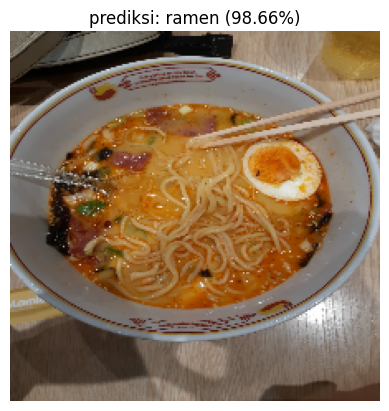

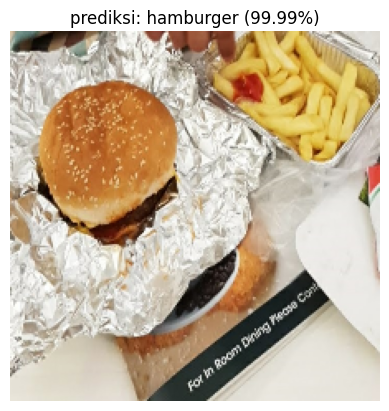

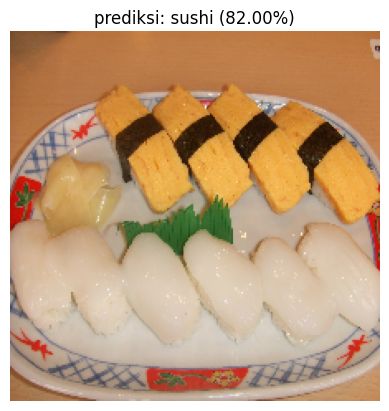

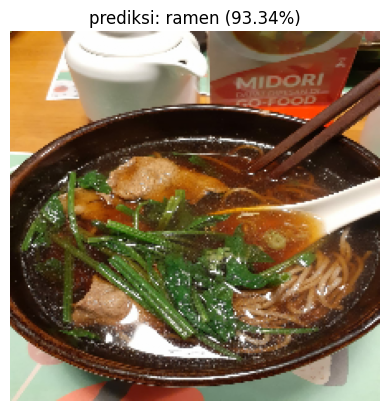

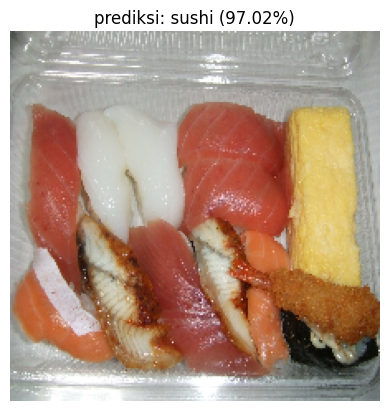

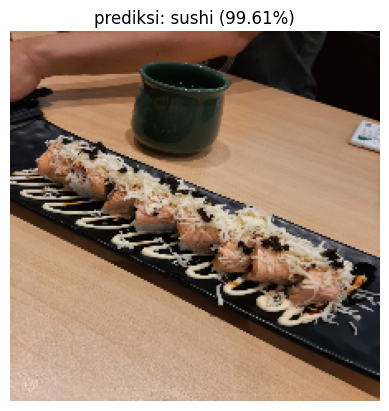

In [ ]:
import matplotlib.pyplot as plt

# Make predictions on custom food images
for img in custom_food_images:

  # Read in the image
  img = tf.io.read_file(img)

  # Decode it into a tensor
  img = tf.io.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, [224, 224])

  pred_prob = best_model_2.predict(tf.expand_dims(img, axis=0)) # make prediction on image with shape [None, 224, 224, 3]
  pred_catg = pred_prob.argmax(axis=-1)
  pred_class = class_names[pred_catg[0]] # find the predicted class label

  # Plot the image with appropriate annotations
  plt.figure()
  plt.imshow(img/255.) # imshow() requires float inputs to be normalized
  plt.title(f"prediksi: {pred_class} ({pred_prob.max()*100:.2f}%)")
  plt.axis(False)